In [32]:
import numpy as np
import matplotlib.pyplot as plt


In [33]:
#generating dummy data for visualization
X = np.arange(10)
Y = (X-5)**2 + 3

print(X, Y)

[0 1 2 3 4 5 6 7 8 9] [28 19 12  7  4  3  4  7 12 19]


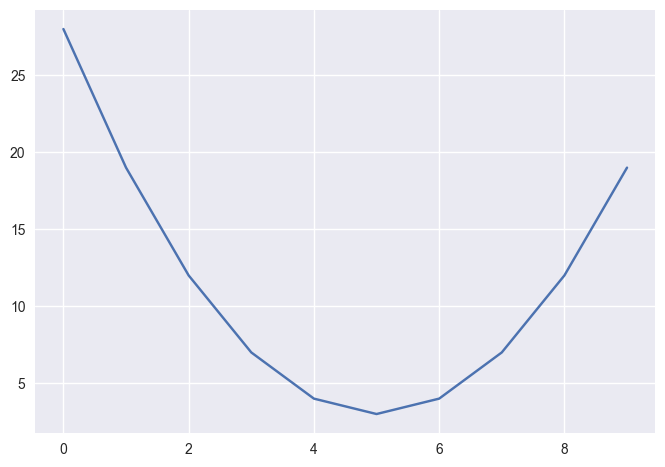

In [34]:
#Visualization
plt.style.use("seaborn-v0_8") # Changed to a valid style
plt.plot(X, Y)
plt.show()

1.0
1.8
2.4400000000000004
2.9520000000000004
3.3616
3.68928
3.9514240000000003
4.1611392
4.32891136
4.4631290880000005
4.570503270400001
4.65640261632
4.725122093056
4.7800976744448
4.82407813955584
4.859262511644672
4.8874100093157375
4.90992800745259
4.927942405962073
4.942353924769658
4.953883139815726
4.9631065118525814
4.9704852094820655
4.976388167585652
4.981110534068522
4.984888427254818
4.987910741803854
4.990328593443083
4.992262874754466
4.993810299803573


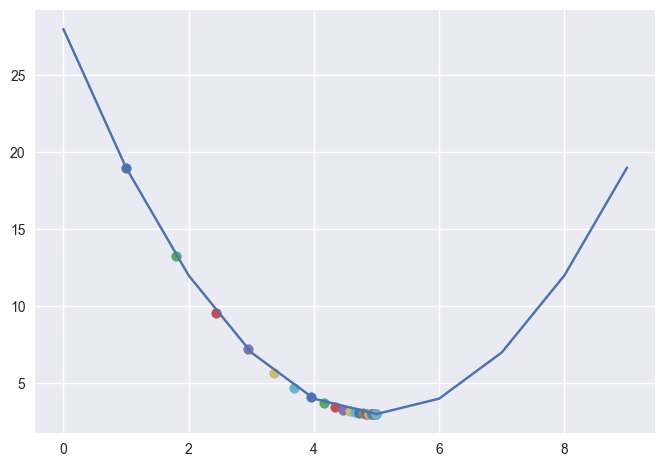

In [35]:
#gradient descent
x = 0
lr = 0.1
plt.plot(X, Y)
for i in range(30):
    grad = 2* (x - 5)
    x = x - lr * grad
    y = (x-5)**2 + 3
    plt.scatter(x, y)
    print(x)

plt.show()

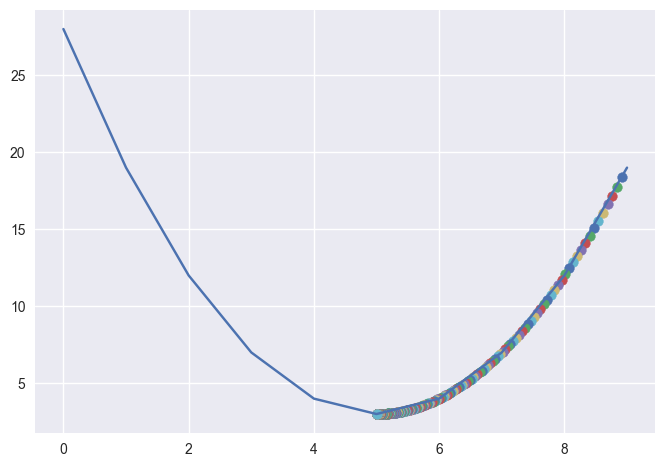

In [36]:
x = 9
lr = .01
plt.plot(X, Y)
for i in range(300):
    grad = 2* (x - 5)
    x = x - lr * grad
    y = (x-5)**2 + 3
    plt.scatter(x, y)

plt.style.use("seaborn-v0_8")
plt.show()

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
def generateDataset(m):
  m = 100
  X = np.random.randn(m)*10
  noise = np.random.randn(m)
  y =3*X + 1 + 5*noise
  return X, y

In [39]:
X, y = generateDataset(10)
print(X.shape, y.shape)

(100,) (100,)


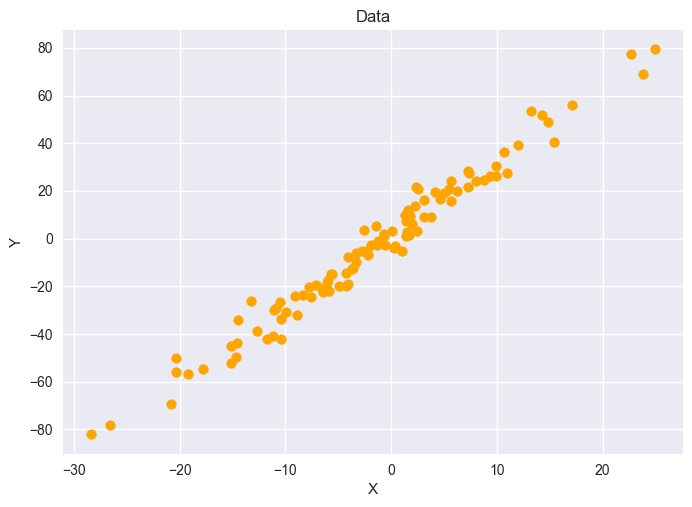

In [40]:
def plotDate(X, y, colour = "orange", title="Data"):
  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.scatter(X, y, c = colour)
  plt.show()

plotDate(X, y)

In [41]:
def normaliseDate(X):
  X_mean = np.mean(X)
  X_std = np.std(X)
  xhat=(X - X_mean)/X_std
  return xhat

2.7755575615628915e-18 0.9999999999999999


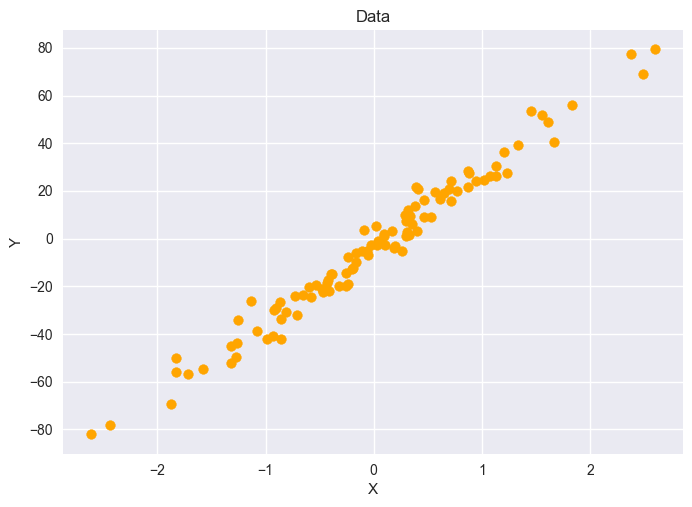

In [42]:
def normaliseDate(X):
  X_mean = np.mean(X)
  X_std = np.std(X)
  xhat=(X - X_mean)/X_std
  return xhat

xhat = normaliseDate(X)
print(xhat.mean(), xhat.std())

plotDate(xhat, y, title="Data")

In [43]:
import numpy as np

def traintestsplit(X, y, split=0.8):
  m = X.shape[0]
  data = np.zeros((m, 2))

  data[:, 0] = X
  data[:, 1] = y
  
  np.random.shuffle(data)

  train_size = int(m*split) #80% of the data
  
  X_train = data[:train_size, 0]
  y_train = data[:train_size, 1]
  X_test = data[train_size:, 0]
  y_test = data[train_size:, 1]
  return X_train, y_train, X_test, y_test

In [44]:
X_train, y_train, X_test, y_test = traintestsplit(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80,) (80,) (20,) (20,)


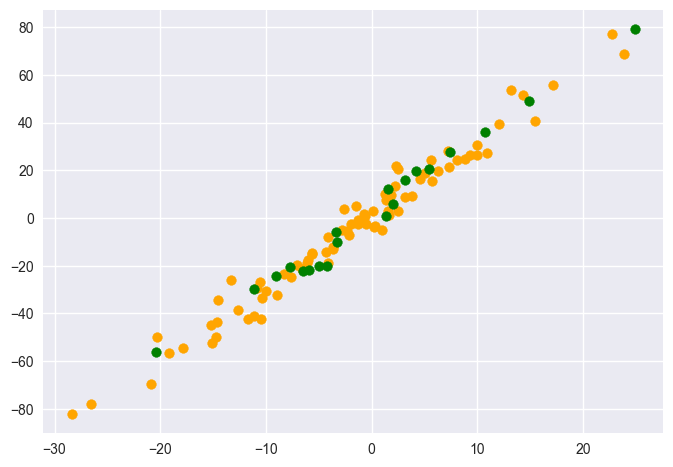

In [45]:
plt.scatter(X_train, y_train, c = "orange")
plt.scatter(X_test, y_test, c = "green")
plt.show()

5.037377198929314 -337.0697677530908


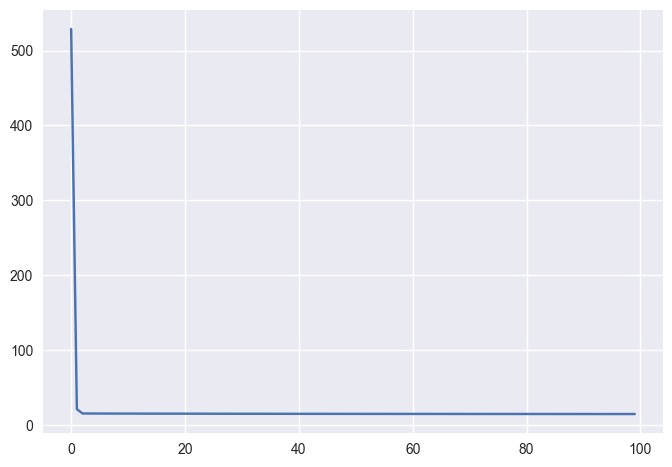

Learned parameters: [0.76789549 3.06148459]


In [46]:
#hypothesis function
def hypothesis(X, theta):
    return theta[0] + theta[1]*X

def error(X, y, theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (y[i] - y_)**2
    return e/(2*m)

def gradient(X, y, theta):
    m = X.shape[0]
    grad0 = 0
    grad1 = 0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        grad0 += (y_ - y[i])
        grad1 += (y_ - y[i]) * X[i]
    return grad0/m, grad1/m

grad0, grad1 = gradient(X_train, y_train, [0, 0])
print(grad0, grad1)

def train(x, y, lr=0.01):
    theta = np.zeros((2,))
    max_iters = 100
    error_list = []

    for i in range(max_iters):
        error_list.append(error(x, y, theta))
        grad0, grad1 = gradient(x, y, theta)
        theta[0] = theta[0] - lr * grad0
        theta[1] = theta[1] - lr * grad1
    plt.plot(error_list)
    plt.show()
    return theta

# Train the model and plot error inside the function
theta = train(X_train, y_train)
print("Learned parameters:", theta)

In [47]:
def predict(X, theta):
    return hypothesis(X, theta)

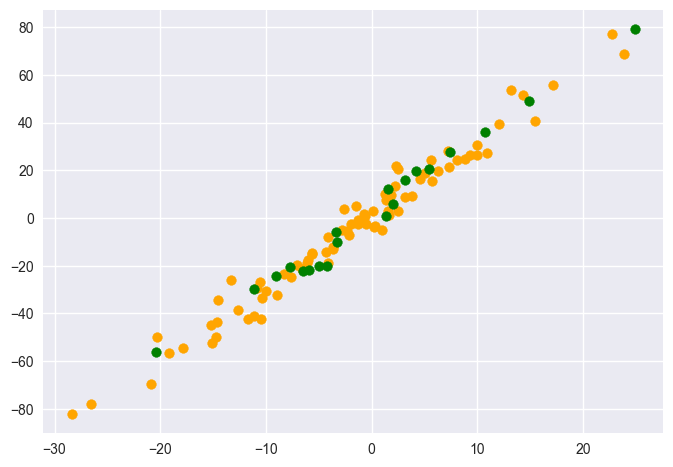

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_train, y_train, c = "orange")
plt.scatter(X_test, y_test, c = "green")
plt.show()

In [49]:
predict(X_test, theta)

array([  4.99687582, -33.23215929,  10.36486748,  23.44138109,
        46.26310638, -17.31189485,  33.52081517,   6.94204712,
        17.42915762,  77.11582891,  -9.36465509, -61.66424194,
       -26.94940409,  13.54217975,   5.5122288 , -12.19408238,
       -19.02394702, -14.38132694,  -9.4515981 , -22.95114674])

In [50]:
X_test.shape

(20,)

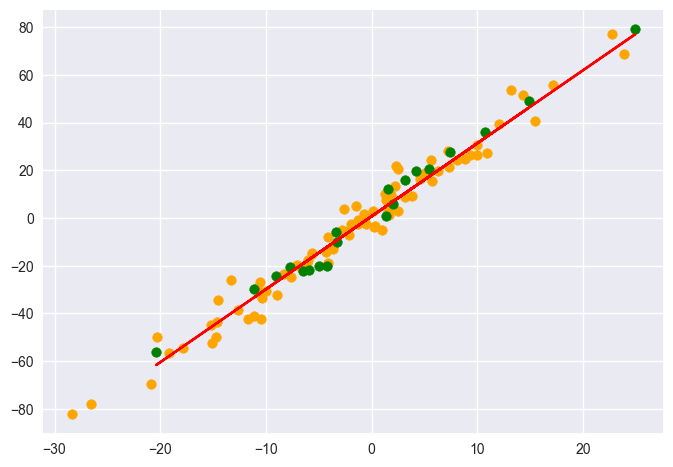

In [51]:
plt.style.use("seaborn-v0_8")
plt.scatter(X_train, y_train, c = "orange", label = "Train Data")
plt.scatter(X_test, y_test, c = "green", label = "Test Data")
y_pred = predict(X_test, theta)
plt.plot(X_test, y_pred, c = "red", label = "Prediction")     


In [53]:
#R2 squared model evaluation metric
#coefficient of determination regresion predictions approximate the real data points
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    denominator = np.sum((y_true - y_mean)**2)
    numerator = np.sum((y_true - y_pred)**2)
    r2 = 1 - (numerator / denominator)
    return r2

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.9802170838445405
